<a href="https://colab.research.google.com/github/Aayushi4925/Bikeshare/blob/main/Copy_of_Rental_Bike_Share_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



### **Bike Share Demand Prediction**
### **Team**
**Team Member 1 -** Aayushi Lashkari

**Team Member 2 -**Ashumendra S. Chandel


# **Project Summary -**

**Name**: **Ashumendra**
**Email Id**:

**Contribution**:

1. Pre-processing data
2. Feature engineering
3. Outlier
4. EDA

**Model application & Evaluation**
1. Linear regression
2. Decision Tree
3. XG boost


**Name**: Aayushi Lashkari
**Email Id**: aayushilashkari@gmail.com

**Contribution**:
1. Pre-processing data
2. Feature engineering
3. Multicollinearity
4. EDA

**Model application & Evaluation**
1. Lasso regression
2. Random forest
3. Gradient Boosting









**Introduction**

Bike-sharing system, is a shared transport service in which bicycles are made available for shared use to
individuals on a short-term basis for a price. Hence It is important to make the rental bike available and
accessible to the public at the right time as it lessens the waiting time.

With the help of this dataset we did prediction of number of bike  required for rent in  regular basis with respect to hour, Day, Weather, Seasons.

The dataset Having features of  weather information like Temperature, Humidity, Windspeed, Visibility, Dewpoint,
Solar radiation, Snowfall, Rainfall, the number of bikes rented per hour and date information.

**Data preparation:**


1. For data manipulation and Visualization we imported librbary,Fetch the information by finding top 5 row, statical information of dataset 
2. Extarct information and changed the dtype of 'Date' Feature,so by this we got month, date, year information.

3. Found NullValue, Duplicates, and came to conclusion that our dataset is clean no duplicates and null value is present.
4. unique value of all the features.
5. perform EDA to draw conclusion on the basis of the data set.
6. Found outliers in boxplot and we remove them with the help of capping.
7. Convert date-time column and split this between 24 hours of a day.
8. Applied the encoding method in  month and hours 
column.
9. performing all above method we had 8760 row and 53 features.
10. After completing the data cleaning. We started analyzing our data.

**EDA Observation:**

1. We have some observations that the demand low after midnight
till morning hours (between 1 am to 6 am) and it's increasing slowly during morning hours and is very
high in evening hours. It seems people are opting for this when they are coming back from their works
(office/college). 
2.Summer seasons has higher demand and winter has less demand.
3.we have no booking on no functioning day.
4. Number of rented bike count in June month.
5. There was a high corelation between Temperature, Dewpoint temp. we dropped dew point feature to remove multicolinearity.

**FeatureTransformation:-**

We transform the Depended Feature by **npsqrt** to transfrom the skewed feature to gaussian curve.

**Data Modeling**

we splited the data in 80% traning and 20%.Then perform the min max scaling in dataset.
Model applied in dataset:-

Linear regression

LASSO

Decision Tree

Random Forest

Gradient Boosting

XG boosting

**Linear regression:**

We started with linear regression where results were no very good. Although the model was working fine
test data as it was working with training dataset.
MAE – 4.64 R2 score – 0.77

**Regularization:**
We applied lasso and ridge regression here in order to find good result. But it was similar to linear
regression. Here performance was similar.
Lasso regression: MAE - 4.64, R2 score - 0.77


**Decision Tres:**
Score was good here as compare to other linear and regularization technique. But it was still not desired
algorithm. So, moved ahead with bagging & boosting.
MAE - 3.47, R2 score – 0.83

**Bagging & Boosting:** 
**Random Forest**:
Random forest with GridSearchCV gives us comparatively good result.
MAE – 3.31, R2 score – 0.86

**Gradient Boost**
We have got the best results here with GridSearchCV. Lowest errors and Highest value of the R2 score.
MAE –2.37 , R2 score –92 


**xg boost**
We have got the best results here with GridSearchCV. Lowest errors and Highest value of the R2 score.
MAE –2.33 , R2 score –92% 

**Conclusion**

After using all model we got conclusion that : Gradient Decent (92% accuracy) XG boosting (92% accuracy) are best model to deploy by appling Gridsearch CV.

As this data is time dependent, the values for variables will not always be consistent. Therefore, we need constantly keep checking for the models.














# **GitHub Link -**

https://github.com/Aayushi4925/Bikeshare

# **Problem Statement**


# **BUSINESS PROBLEM OVERVIEW**
Currently rental bikes are introduced in many urban city for the enhancement of mobility comfort.It is importtant to make the rental bike available and acessible to the public at the right time as it lessens the waiting time. Eventualy, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Import the Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#import the metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

# loading dataset
bike_share_dataset=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='Latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#copy of dataset

df=bike_share_dataset.copy()

### Dataset First View

In [ ]:
# TOP 5 view

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(8760, 14)

Total 8760 observations & 14 Features

### Dataset Information

In [ ]:
# Statical information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Here we have observed that Date feature in object form, we have to chnge the dtype of '**Date**' to extract Date, Year, Month, 3 features dtype  are in object form,4 features are in integer form, and 6 are in flotae dtypes

we will change 'hour' feature from integer to object dtype.

#### Duplicate Values

In [ ]:

# to know about duplicate data in our datasets 
df.duplicated().value_counts()

False    8760
dtype: int64

No duplicate observations found

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# checking the null value in each column of datasets
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No null value are present in Dataset

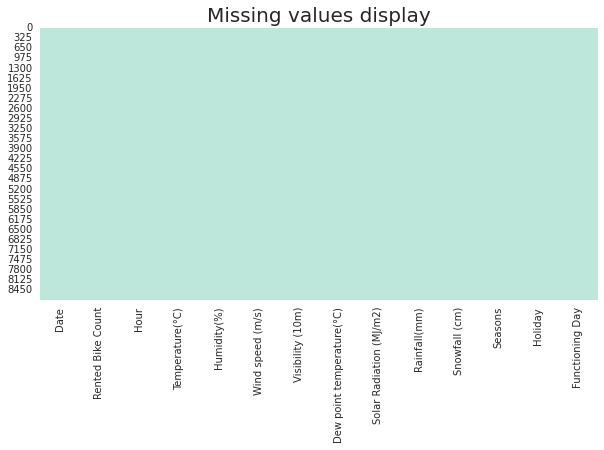

In [ ]:
# Heatmap to see null values in dataset

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='icefire')
plt.title('Missing values display',fontsize=20)
plt.show()

### What did you know about your dataset?

The given dataset is related to rental bike segment in which we have to predict the rental bike count per hour so that supply of rental bike per hour should be smooth.

In this data set 8760 rows and 14 columns are present.

'DATE' feature in object form so we have to convert into Date time format.

No Null value and duplicates value is present.

We will check the outlier further if required.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Rename the Features for easy understanding
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
# New column name
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# Dataset Describe
# for Integer value
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.60,645.00,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.50,6.92,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.88,11.94,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.23,20.36,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.72,1.04,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.83,608.30,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.07,13.06,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.57,0.87,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.15,1.13,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.08,0.44,0.0,0.00,0.00,0.00,8.80


Max. rental count is 3556

max. Temp is 39.This Feature may effect our Depended variable.
 
Hour will be converted into Categorical dtype.





In [ ]:
# for Object type data

df.describe(include='object').T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning_Day,8760,2,Yes,8465


# **Variables Description **



### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)Answer Here

### Check Unique Values for each variable.

In [ ]:
# check no. of unique values in each columns 
df.nunique().sort_values(ascending=False)

Rented_Bike_Count        2166
Visibility               1789
Dew_point_temperature     556
Temperature               546
Date                      365
Solar_Radiation           345
Humidity                   90
Wind_speed                 65
Rainfall                   61
Snowfall                   51
Hour                       24
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [ ]:
# we are checking here some wrong entries like #,@,%,?,+,& in string or in integer type coloumn that we are unable to find during null value detection. 
for num,col in enumerate(df.columns,1):
    print('\n')
    print(num,')\n','{} : {}'.format(col,df[col].unique().tolist()))



1 )
 Date : ['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017', '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017', '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017', '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017', '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017', '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017', '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017', '29/12/2017', '30/12/2017', '31/12/2017', '01/01/2018', '02/01/2018', '03/01/2018', '04/01/2018', '05/01/2018', '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018', '10/01/2018', '11/01/2018', '12/01/2018', '13/01/2018', '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018', '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018', '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018', '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018', '30/01/2018', '31/01/2018', '01/02/2018', '02/02/2018', '03/02/2018', '04/02/2018', '05/02/2018', '06/02/2018', '07/02/2018', '08/02/2018', '09/0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Treating Date column 
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# Updated information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
# now we are extracting Date, Year, month.

# spliting our date column in date, month and year for better understanding

df['day_of_week'] = df['Date'].dt.day_name()          # extraxt day
df['Month'] = df['Date'].dt.month_name() # extracting month column from date 
df['Year'] = df['Date'].dt.year
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Dropping Date column from the dataset

df.drop('Date',axis=1,inplace=True) 

In [ ]:
# updated Features of Dataset
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'day_of_week',
       'Month', 'Year'],
      dtype='object')

In [ ]:
# divide our dataset on the base of categorical and numerical features 


# numerical features 
num_df=df.select_dtypes(exclude='object')

# categorical
catg_df=df.select_dtypes(include='object')

print(f'The columns of numerical Data-types is:-\n\n',num_df.columns)

print('\n')
print('\n')

print(f'The columns of Categorical Data-types is:-\n\n',catg_df.columns)

The columns of numerical Data-types is:-

 Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year'],
      dtype='object')




The columns of Categorical Data-types is:-

 Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'day_of_week',
       'Month'],
      dtype='object')


### What all manipulations have you done and insights you found?

We have extracted Date,Month,Hour,Year from Date Feature after converting it into DateTime format which was in Object dtype 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Visualization of categorical Data

#### Chart - 1

In [ ]:
# Total Categorical Features
catg_df.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'day_of_week',
       'Month'],
      dtype='object')

In [ ]:
# Chart - 1 visualization code
catg_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

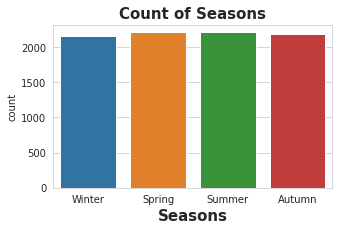

In [ ]:
fig=plt.figure(figsize=(5,3))

sns.countplot(df['Seasons'])
plt.title('Count of Seasons',fontsize=15,fontweight='bold')
plt.xlabel('Seasons',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts is used here to show segments of information.

Here we have used this to show the distribution of rental bike SEASONS wise

##### 2. What is/are the insight(s) found from the chart?

We Have found that Spring and summer seasons having approximate same rental bike count



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As Our Dataset is related to demand of Bike.

By above information we can not conclude that bike count is depend on seasons wise as all seasons having approximate same output and its a aggregate value so we can't conclude with this information.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

catg_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

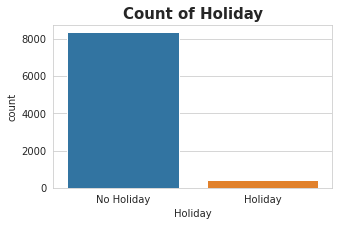

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(df['Holiday'])
plt.title('Count of Holiday',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Here we have used this to show the number of holidays and no holidays

##### 2. What is/are the insight(s) found from the chart?

Here the holidays count is less compare to No holidays count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the number of count of no holidays is more so it direclty indicate that the number of rental bike consumed in working days 

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
catg_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

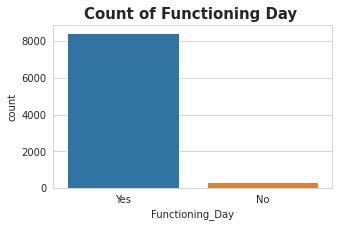

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(df['Functioning_Day'])
plt.title('Count of Functioning Day ',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

It is used to show the distribution of No(Non Functional Hours), yes(Functional hours) in functioning features

##### 2. What is/are the insight(s) found from the chart?

almost all rental bike count used in working hours

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is clearly shown that the number of rental bike count value showing majority in working hr so it means most number of bike count prefer to working time, so we have to consider this factor during modeling and outlier treatment 



---



#### Chart - 4

Month
June         706728
July         691339
May          665948
October      626988
August       614190
April        556219
September    499326
November     493412
March        455037
December     311771
January      287244
February     264112
Name: Rented_Bike_Count, dtype: int64



-------------





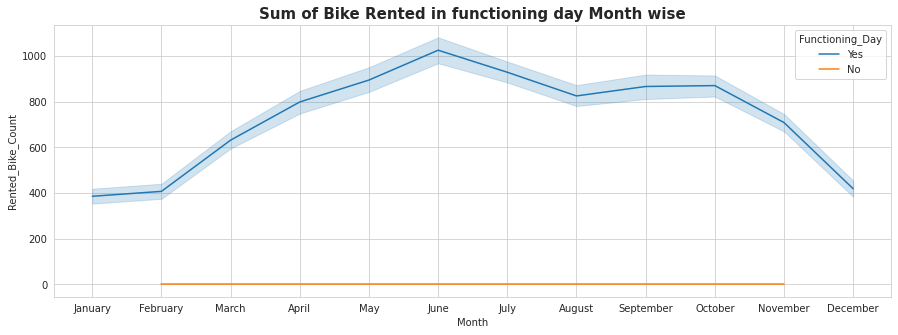

In [ ]:

# relation btw seasons and rented bike count

monthly_bike_count=df.groupby('Month')['Rented_Bike_Count'].sum().sort_values(ascending=False)
print(monthly_bike_count)
print('\n\n')
print('-------------')
print('\n\n')
ffig=plt.figure(figsize=(15,5))

sns.lineplot(x=df['Month'], y=df['Rented_Bike_Count'], hue=df['Functioning_Day'])
plt.title('Sum of Bike Rented in functioning day Month wise',fontsize=15,fontweight='bold')

fig.patch.set_facecolor('#fffcc4')

plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of bike count month wise

##### 2. What is/are the insight(s) found from the chart?

In JUNE month no. of bike count is more 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

During summer time rental bike count is more,So we have to make perception that during summer (june) people prefer more to travel either for office, traveling etc  

#### Chart - 5

Text(0.5, 1.0, 'count of rented bike acc to season')

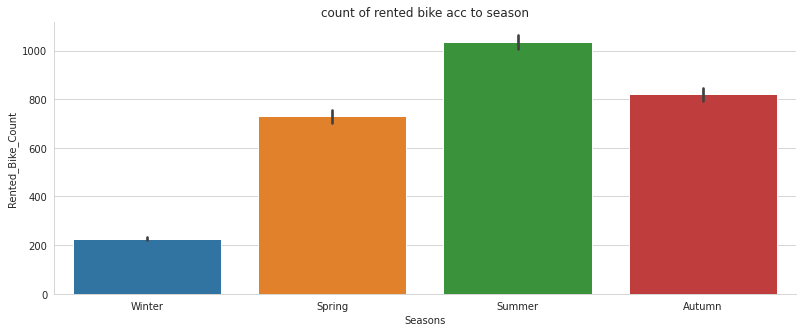

In [ ]:

# to check rental bikes count on the basis of season
sns.catplot(x = 'Seasons' , y = 'Rented_Bike_Count' , data = df , kind = 'bar' , height = 4.5 , aspect = 2.5 )
plt.title('count of rented bike acc to season')

##### 1. Why did you pick the specific chart?

To check the distribution of bike count month wise

##### 2. What is/are the insight(s) found from the chart?

In summer seasons the number of bike count is more it means seasons wise number of bike count differ

#### Chart - 6

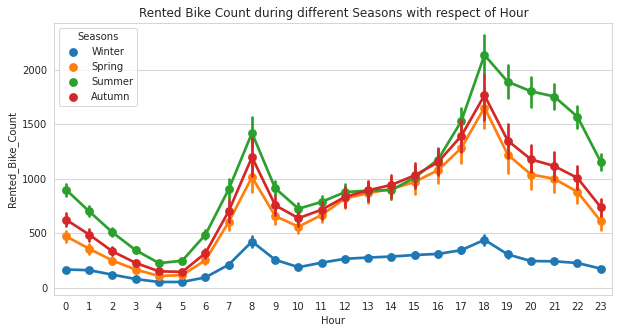

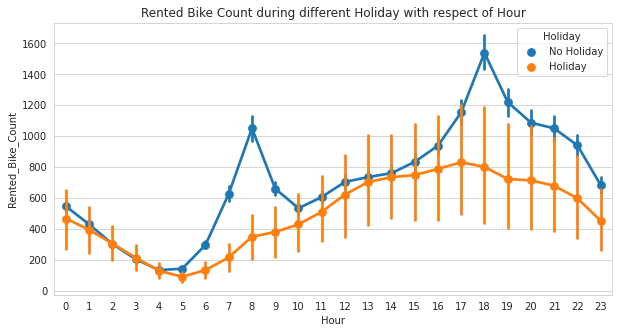

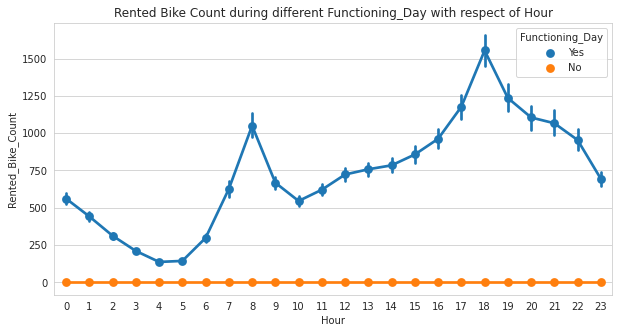

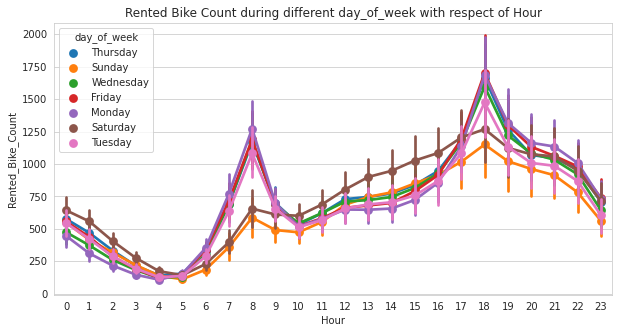

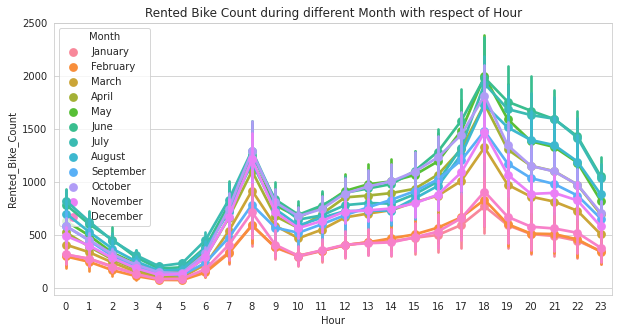

In [ ]:
#create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in catg_df.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##### 1. Why did you pick the specific chart?

Line charts are usually used in identifying the trends in data

##### 2. What is/are the insight(s) found from the chart?

1) in summer seasons rental bike count is more

2)On monday rental bike count is more and low in sunday

3)In june rental bike count is more and in january rental bike count is less

4)In summer seasons rental bike count is more as already saw that in june motnth rental bike count is more


#### Chart - 14 - Correlation Heatmap

In [ ]:
# now corelation b/w the  dependent varaiables with rented bike count
df.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.121108
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Year                     0.215162
Name: Rented_Bike_Count, dtype: float64

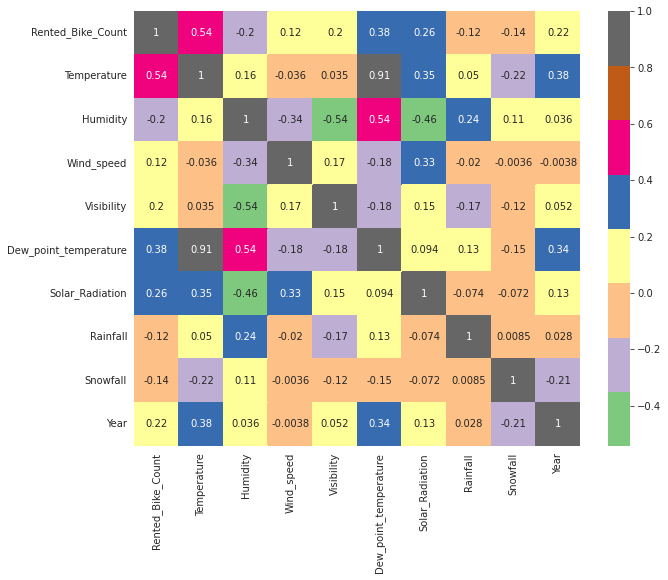

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Accent')
plt.show()

##### 1. Why did you pick the specific chart?

To find the co-relation between two features

##### 2. What is/are the insight(s) found from the chart?

There is a corelation between dew point temp and temperature, it will create complexty during modeling. so we will drop in future.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
day_of_week              0
Month                    0
Year                     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

no missing value is present.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# divide our dataset on the base of categorical and numerical features 


# numerical features 
num_df=df.select_dtypes(exclude='object')

# categorical
catg_df=df.select_dtypes(include='object')

print(f'The columns of numerical Data-types is:-\n\n',num_df.columns)

print('\n')
print('\n')

print(f'The columns of Categorical Data-types is:-\n\n',catg_df.columns)



The columns of numerical Data-types is:-

 Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year'],
      dtype='object')




The columns of Categorical Data-types is:-

 Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'day_of_week',
       'Month'],
      dtype='object')


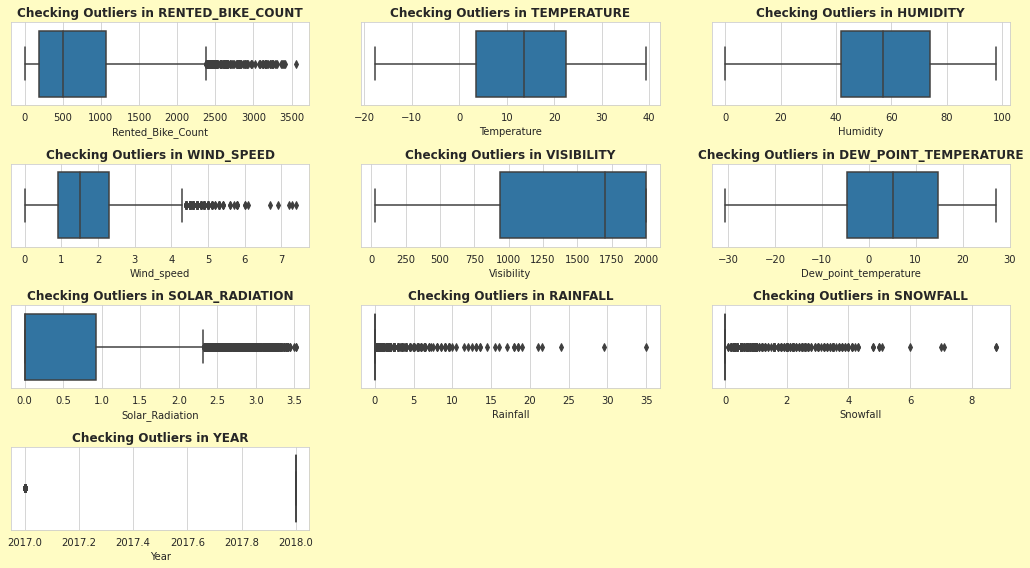

In [ ]:
# boxplot to check outliers in numerical columns 
n = 1
fig=plt.figure(figsize=(15,8))

for col in num_df.columns:
  plt.subplot(4,3,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title('Checking Outliers in {}'.format(col.upper()),fontsize=12,fontweight='bold')
  plt.xlabel(col)

fig.patch.set_facecolor('#fffcc4')

plt.tight_layout()

As rainfall and Snowfall looking important feature at present. It may impact on result if we manipulate value,So not removing any outlier any at present from that feature

In [ ]:
#Know the maximum value of each column to get an idea about outlier

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())

7.4
3.52


In [ ]:
# Treating Outliers in WindSpeed, Solar_Radiation.

df.loc[df['Solar_Radiation']>2.4,'Solar_Radiation']=2.4
df.loc[df['Wind_speed' ]>=5,'Wind_speed']= 5

# Know the maximum value

print(df['Wind_speed'].max())
print(df['Solar_Radiation'].max())

5.0
2.4


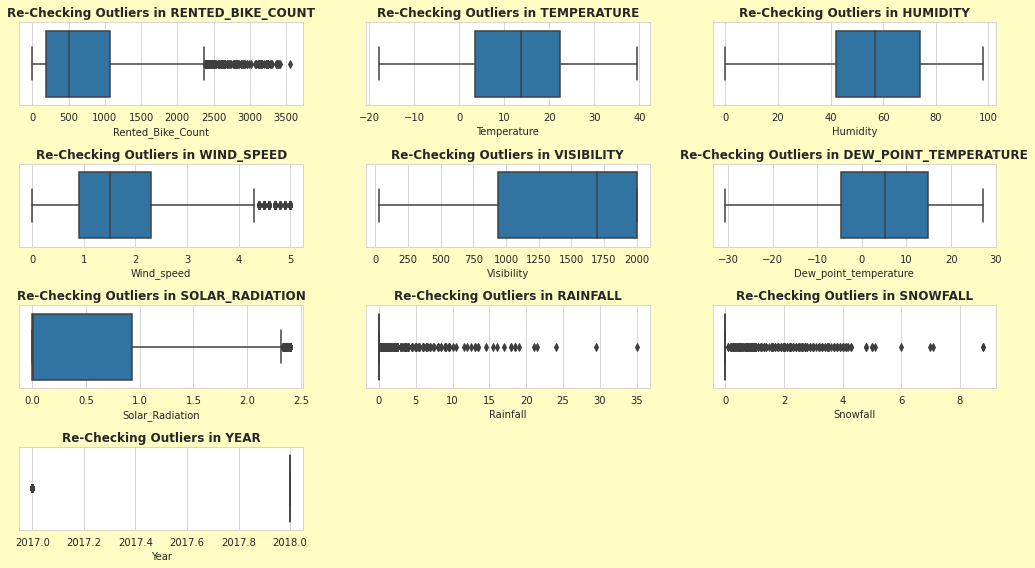

In [ ]:
# Re-Checking Outlier 
n = 1
fig=plt.figure(figsize=(15,8))

for col in num_df.columns:
  plt.subplot(4,3,n)
  n=n+1
  sns.boxplot(df[col])
  plt.title('Re-Checking Outliers in {}'.format(col.upper()),fontsize=12,fontweight='bold')
  plt.xlabel(col)

fig.patch.set_facecolor('#fffcc4')

plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used box plot method to remove outlier. As this is best method to calculate the oulier with the help of IQR value

The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Q1 is the “middle” value in the first half of the rank-ordered data set.

Q2 is the median value in the set.

Q3 is the “middle” value in the second half of the rank-ordered data set.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

encoders_nums = {"year":{"2017":1,"2018":2} }
df= df.replace(encoders_nums)

In [ ]:
# Change to Categorical dtype 

df['Snowfall'] = df['Snowfall'].apply(lambda x: 1 if x>0 else 0)
df['Rainfall'] = df['Rainfall'].apply(lambda x: 1 if x>0 else 0)

Visibility is a measure of the horizontal opacity of the atmosphere at the point of observation and is expressed in terms of the horizontal distance at which a person should be able to see and identify:  in the daytime, a prominent dark object against the sky at the horizon; at night, a known, preferably unfocused, moderately intense light source.

Converting visibility based on the above mentioned threshold values. Since they are ordinal,

we can encode them as

0 (low visibility) 

1 (medium visibility)

2 (high visibility)

In [ ]:
# encoding of visibility
df['Visibility'] = pd.cut(df.Visibility,bins=[0,750,1400,2001],labels=[0,1,2])

### **One Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns = ['Month', 'Hour','day_of_week','Functioning_Day','Holiday'],drop_first=True)

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Year', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'Functioning_Day_Yes', 'Holiday_No Holiday'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding done in Year feature

Converting the 'Snowfall', 'Rainfall' feature in categorical column as the snowfall anf rainfall not occure regular so its better to covert into categorical feature

visibility feature also characterize in categorical feature

One hot encoding applied in 'Month', 'Hour','day_of_week','Functioning_Day','Holiday' feature 

we are doing encoding here because our model do not understand the string dtype so converting from string to numerical dtype. 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:

# multicolinearity with te help of vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Year','Dew_point_temperature','Humidity']]] )

,variables,VIF
0,Temperature,4.103033
1,Wind_speed,5.077985
2,Solar_Radiation,6.033605
3,Rainfall,1.179735
4,Snowfall,1.262867
5,Month_August,2.025521
6,Month_December,2.008624
7,Month_February,1.808838
8,Month_January,2.060924
9,Month_July,2.071438


##### What all feature selection methods have you used  and why?

for selection of feature with the help of VIF so that we can remove muliticolinearity

Heatmap also used before for finding co-relation between two feature 

by using above two we can remove multicolinearity from our dataset

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

yes, Here feature should be in BELL curves or gaussian cuve

in our dataset some features are skewed. so to remove skewness we have to do feataure transformation so that features curves follow gaussian curves trends 

In [ ]:
df['Rented_Bike_Count'].skew()

1.1534281773679014

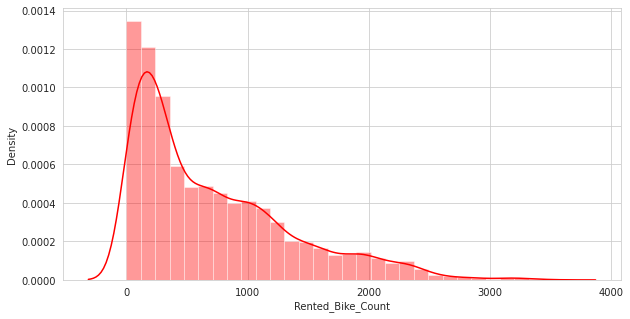

In [ ]:
# Transform Your data

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df['Rented_Bike_Count'], kde = True, color ='red', bins = 30)

plt.show()

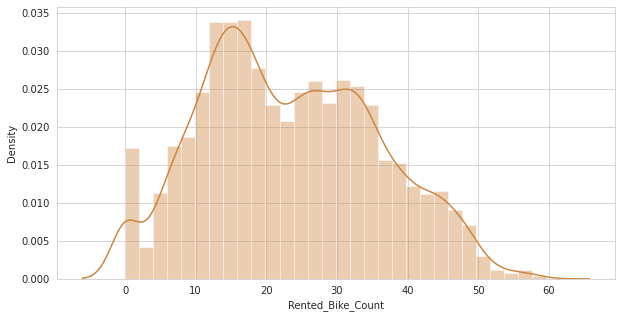

In [ ]:
#applying npsqrt for featrure transformation as its a right skewd so it work best in this
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(np.sqrt(df['Rented_Bike_Count']), kde = True, color ='peru', bins = 30)

plt.show()

In [ ]:
df['Rented_Bike_Count']=np.sqrt(df['Rented_Bike_Count'])

In [ ]:
df['Rented_Bike_Count'].max()

59.632206063502295

In [ ]:
# For independed skewness are given below

df.skew()

Rented_Bike_Count        0.237362
Temperature             -0.198326
Humidity                 0.059579
Wind_speed               0.808268
Dew_point_temperature   -0.367298
Solar_Radiation          1.294146
Rainfall                 3.695907
Snowfall                 4.102840
Year                    -2.978262
Month_August             2.978262
Month_December           2.978262
Month_February           3.181551
Month_January            2.978262
Month_July               2.978262
Month_June               3.042925
Month_March              2.978262
Month_May                2.978262
Month_November           3.042925
Month_October            2.978262
Month_September          3.042925
Hour_1                   4.588103
Hour_2                   4.588103
Hour_3                   4.588103
Hour_4                   4.588103
Hour_5                   4.588103
Hour_6                   4.588103
Hour_7                   4.588103
Hour_8                   4.588103
Hour_9                   4.588103
Hour_10       

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Year', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'Functioning_Day_Yes', 'Holiday_No Holiday'],
      dtype='object')

In [ ]:
df.drop(['Seasons','Year','Dew_point_temperature'],axis=1, inplace=True)

Dropping 'Seasons,'Year','Dew_point_temperature'

we are using month feature so if using seasons feature it will create compleaxity

dew point temp show the hight co-relation between 'Temperature' so we have to remove any one of this.

year feature is not showing much weightage with depended variable so for this we have removed this

In [ ]:
# Defining dependent and independent variables
X = df.drop('Rented_Bike_Count',axis=1)
y = df['Rented_Bike_Count']

In [ ]:
df.shape

(8760, 50)

### 6. Data Scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Copy of train test features as in decison tree scaling of feature are not required, but for linear regression it requires 

In [ ]:
# copy of Xtrain and Xtest 
x_train1=X_train
x_test1=X_test
y_train1=y_train
y_test1=y_test

Data Scaling

In [ ]:
# Scaling
scaler = MinMaxScaler()
scaler_feature=['Temperature','Snowfall','Wind_speed','Solar_Radiation','Visibility','Rainfall']
scaler.fit(x_train1[scaler_feature])
x_train1[scaler_feature] = scaler.transform(x_train1[scaler_feature])          # or: fit_transform(X_train)
x_test1[scaler_feature]= scaler.transform(x_test1[scaler_feature])

In [ ]:
x_train1.shape

(7008, 49)

In [ ]:
x_test1.shape

(1752, 49)

##### What data splitting ratio have you used and why? 

80% in train

20 % in test

## ***7. ML Model Implementation***

Evaluation Metric we will going to use...
### **Mean Absolute Error (MAE):**
It is the average of the absolute differences between the actual value and the model’s predicted value.

A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. MAE of 0 means that your model is a perfect predictor of the outputs.

### **Mean Squared Error (MSE):**
It is the average of the squared differences between the actual and the predicted values.

If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

MSE uses the square operation to remove the sign of each error value and to punish large errors.

### **Root Mean Squared Error (RMSE):**

It is the average root-squared difference between the real value and the predicted value. By taking a square root of MSE, we get the Root Mean Square Error.

We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions. A Higher RMSE indicates that there are large deviations between the predicted and actual value.

### **R² score:**
R-squared explains to what extent the variance of one variable explains the variance of the second variable. In other words, it measures the proportion of variance of the dependent variable explained by the independent variable.


R² score ranges from 0 to 1. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model. If R² is negative, the regression model is erroneous

### **Adjusted R-Square:**

Adjusted R² is the same as standard R² except that it penalizes models when additional features are added.

The value of adjusted r-square is always less than or equal to the value of r-square.

### ML Model - 1

### **Linear Regression..**

A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X.

A multiple linear regression model is

y
i
=β
0
+β
1
X
i1
+β
2
X
i2
+⋯+β
p
X
ip
+ε
i
, i=1,⋯,n,

In [ ]:
#Implementation
from sklearn.linear_model import LinearRegression

# Fit the Algorithm
Linear_reg=LinearRegression().fit(x_train1,y_train1)


In [ ]:
Linear_reg.score(x_train1, y_train1)

0.7728131214059635

In [ ]:
Linear_reg.coef_

array([ 3.20603926e+01, -7.83534836e-02, -1.13619447e+00,  1.23372775e+00,
        2.90164137e+00, -1.26221571e+01, -2.90363993e-01, -2.87538819e+00,
       -1.06123284e+00, -3.49479491e+00, -2.28053413e+00, -2.70151445e+00,
        2.16434098e+00, -6.67179443e-01,  6.32116756e-01,  1.99333169e+00,
        2.52552609e+00,  2.38443493e-02, -2.35339392e+00, -5.14307369e+00,
       -7.14313701e+00, -1.02114110e+01, -9.52995682e+00, -4.55620445e+00,
        1.27931231e+00,  7.53428970e+00,  7.64435122e-01, -3.74675210e+00,
       -3.40089642e+00, -2.80173991e+00, -2.95577282e+00, -2.87795320e+00,
       -1.73400150e+00, -2.43761959e-01,  3.86785951e+00,  1.02708662e+01,
        6.88354252e+00,  5.76465045e+00,  6.31203024e+00,  4.70600916e+00,
        1.12792367e+00, -2.68365555e-01, -6.99845555e-01, -1.57219825e+00,
       -7.67295754e-01, -6.08816660e-01, -2.29917207e-03,  2.61301373e+01,
        2.35267669e+00])

In [ ]:
len(Linear_reg.coef_)

49

In [ ]:
Linear_reg.intercept_

-15.63726623683991

In [ ]:
# to store y_pred for our train and test data 
Y_train_pred = Linear_reg.predict(x_train1)
Y_test_pred = Linear_reg.predict(x_test1)

In [ ]:
Y_test_pred

array([20.00693537, 16.1599649 , 34.51610861, ..., 22.4564953 ,
       22.00806004, 44.78278881])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Score matrics on train data
print(f"Linear regression training set metrics:")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_lr1 = ( mean_squared_error(y_train1, Y_train_pred))
print("MSE", MSE_lr1)

MAE_lr1 = (mean_absolute_error(y_train1, Y_train_pred))
print("MAE", MAE_lr1)

RMSE_lr1 = (np.sqrt(mean_squared_error(y_train1, Y_train_pred)))
print("RMSE", RMSE_lr1)

R2_score_lr1 = r2_score(y_train1, Y_train_pred)
print("R2_score", R2_score_lr1)

Adjusted_r2_lrl = (1-(1-r2_score(y_train1, Y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2" , Adjusted_r2_lrl)
print()

#Score matrics on test data
print(f"Linear regression testing set metrics:")

MSE_lr2 = ( mean_squared_error(y_test1, Y_test_pred))
print("MSE", MSE_lr2)

MAE_lr2 = (mean_absolute_error(y_test1, Y_test_pred))
print("MAE", MAE_lr2)

RMSE_lr2 = (np.sqrt(mean_squared_error(y_test1, Y_test_pred)))
print("RMSE", RMSE_lr2)

R2_score_lr2 = r2_score(y_test1, Y_test_pred)
print("R2_score", R2_score_lr2)

Adjusted_r2_lr2 = 1-((1-R2_score_lr2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_r2" , Adjusted_r2_lr2)


Linear regression training set metrics:
MSE 35.240226152243686
MAE 4.563191096873248
RMSE 5.936347879988477
R2_score 0.7728131214059635
Adjusted_r2 0.7662724885909765

Linear regression testing set metrics:
MSE 35.82428561801868
MAE 4.637103997347237
RMSE 5.985339223303779
R2_score 0.7682382355022159
Adjusted_r2 0.7615658932810694


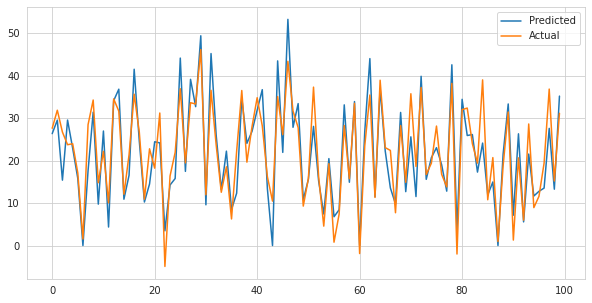

In [ ]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(10,5))
plt.plot(np.array((y_test1)[100:200]))
plt.plot((Y_test_pred)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat linear training and test data score metrics

dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'RMSE':round((RMSE_lr1),2),
       'R2_score':round((R2_score_lr1),2),
       'Adjusted R2':round((Adjusted_r2_lrl),2)
       }
lr_dict1 = pd.DataFrame(dict1,index=[1])
training_df=pd.DataFrame(dict1,index=[1])

# storing the test set metrics value in a dict for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr2),2),
       'MSE':round((MSE_lr2),2),
       'RMSE':round((RMSE_lr2),2),
       'R2_score':round((R2_score_lr2),2),
       'Adjusted R2':round((Adjusted_r2_lr2 ),2)
       }
lr_dict2 = pd.DataFrame(dict2,index=[1])
test_df=pd.DataFrame(dict2,index=[1])

In [ ]:
# linear regression score for train and test data
result=pd.concat([lr_dict1,lr_dict2],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Linear regression,4.56,35.24,5.94,0.77,0.77
Test set,1,Linear regression,4.64,35.82,5.99,0.77,0.76


### **Lasso**
The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. 

This regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1]})

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001}


In [ ]:
lasso = Lasso(alpha=0.001)

In [ ]:
lasso.fit(x_train1,y_train1)

Lasso(alpha=0.001)

In [ ]:
lasso.coef_

array([ 3.21117850e+01, -7.89423842e-02, -1.09146118e+00,  1.22631779e+00,
        2.74178650e+00, -1.26117641e+01, -2.73183988e-01, -2.85660517e+00,
       -1.05152430e+00, -3.47810983e+00, -2.27377096e+00, -2.67321836e+00,
        2.16394643e+00, -6.45404922e-01,  6.33063598e-01,  1.98454311e+00,
        2.52273077e+00,  7.91020765e-03, -2.25290838e+00, -5.03954569e+00,
       -7.04173118e+00, -1.01076223e+01, -9.42560882e+00, -4.44995988e+00,
        1.34202605e+00,  7.61175109e+00,  8.61049275e-01, -3.57654496e+00,
       -3.21723416e+00, -2.61342072e+00, -2.76723294e+00, -2.69574163e+00,
       -1.56147043e+00, -9.06977418e-02,  3.94893835e+00,  1.03296844e+01,
        6.92966104e+00,  5.80843466e+00,  6.35665877e+00,  4.75280231e+00,
        1.17852144e+00, -2.33330324e-01, -6.60472692e-01, -1.53904840e+00,
       -7.29548813e-01, -5.74689262e-01,  1.72753951e-02,  2.60855342e+01,
        2.33018950e+00])

In [ ]:
Y_pred_train_lasso=lasso.predict(x_train1)

In [ ]:
Y_pred_train_lasso

array([30.05842937, 10.51868358, 28.02675085, ..., 31.50176605,
       24.48820584, 23.26188937])

In [ ]:
Y_pred_test_lasso= lasso.predict(x_test1)

In [ ]:
#Score matrics on train data
print(f"Lasso training set metrics:")

MSE_lasso1 = (mean_squared_error(y_train1, Y_pred_train_lasso))
print("MSE", MSE_lasso1)

MAE_lasso1 = (mean_absolute_error(y_train1, Y_pred_train_lasso))
print("MAE", MAE_lasso1)

RMSE_lasso1 = (np.sqrt(mean_squared_error(y_train1, Y_pred_train_lasso)))
print("RMSE", RMSE_lasso1)

R2_lasso1 = r2_score(y_train1, Y_pred_train_lasso)
print('R2', R2_lasso1)

Adjusted_r2_lasso1 = 1-(1-(R2_lasso1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_lasso1)
print()

#Score matrics on test data
print(f"Lasso test set metrics:")

MSE_lasso2 = (mean_squared_error(y_test1, Y_pred_test_lasso))
print("MSE", MSE_lasso2)

MAE_lasso2 = (mean_absolute_error(y_test1, Y_pred_test_lasso))
print("MAE", MAE_lasso2)

RMSE_lasso2 = (np.sqrt(mean_squared_error(y_test1, Y_pred_test_lasso)))
print("RMSE", RMSE_lasso2)

R2_lasso2 = r2_score(y_test1, Y_pred_test_lasso)
print('R2', R2_lasso2)

Adjusted_r2_lasso2 = 1-(1-(R2_lasso2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_lasso2)

Lasso training set metrics:
MSE 35.24201610587668
MAE 4.563249194896042
RMSE 5.9364986402657145
R2 0.772801581923301
Adjusted_R2 0.7782438465847327

Lasso test set metrics:
MSE 35.834464537671614
MAE 4.639242154744287
RMSE 5.986189483943154
R2 0.7681723839621574
Adjusted_R2 0.790287805122055


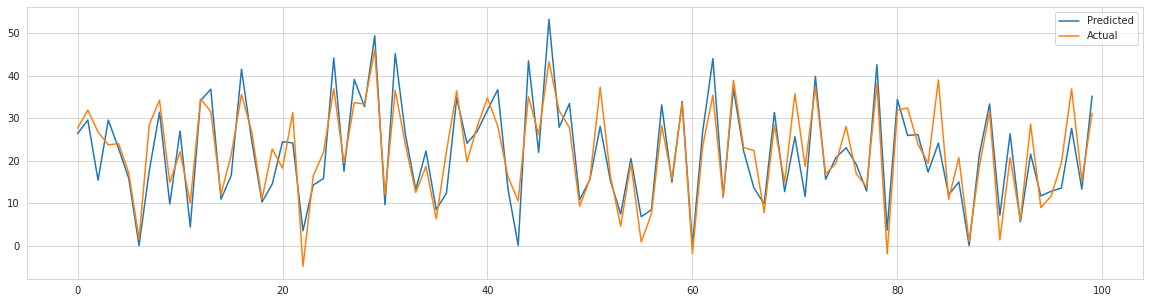

In [ ]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(20,5))
plt.plot(np.array((y_test1)[100:200]))
plt.plot((Y_pred_test_lasso)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat lasso training and test data score metrics

dict3={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso1),2),
       'MSE':round((MSE_lasso1),2),
       'RMSE':round((RMSE_lasso1),2),
       'R2_score':round((R2_lasso1),2),
       'Adjusted R2':round((Adjusted_r2_lasso1),2)
       }
lasso_dict3 =pd.DataFrame(dict3,index=[1])
training_df=training_df.append(dict3,ignore_index=True)

# storing the test set metrics value in a dict4 for later comparison
dict4={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso2),2),
       'MSE':round((MSE_lasso2),2),
       'RMSE':round((RMSE_lasso2),2),
       'R2_score':round((R2_lasso2),2),
       'Adjusted R2':round((Adjusted_r2_lasso2 ),2)
       }
lasso_dict4 =pd.DataFrame(dict4,index=[1])
test_df=test_df.append(dict4,ignore_index=True)

In [ ]:
result=pd.concat([lasso_dict3,lasso_dict4],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Lasso regression,4.56,35.24,5.94,0.77,0.78
Test set,1,Lasso regression,4.64,35.83,5.99,0.77,0.79


### Decision Tree

 Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

 Important Terminology related to Decision Trees:-
 

**Root Node:** It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

**Splitting:** It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

**Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.

**Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

**Branch / Sub-Tree: **A subsection of the entire tree is called branch or sub-tree.

**Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

In [ ]:
# ML Model - 3 Implementation
dt_tree = DecisionTreeRegressor(random_state=0)

params = {'max_depth':np.arange(20,26,1),
             'min_samples_leaf':np.arange(20,28,1)
             }

In [ ]:
dt_tree_gridsearch = GridSearchCV(dt_tree,
                             params,
                             cv=5,
                             scoring= 'neg_root_mean_squared_error')
dt_tree_gridsearch.fit(X_train,y_train)
dt_best_params = dt_tree_gridsearch.best_params_

In [ ]:
dt_best_params

{'max_depth': 25, 'min_samples_leaf': 20}

In [ ]:
# Model with best parameter
dt_tree = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 random_state=1)

In [ ]:
dt_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=25, min_samples_leaf=20, random_state=1)

In [ ]:
#Y_pred for traning and testing dataset
Y_pred1_dt = dt_tree.predict(X_train)
Y_pred2_dt = dt_tree.predict(X_test)

In [ ]:
dt_tree.score(X_train,y_train)

0.8652879883206086

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Score matrics on train data
print(f"Decision Tree: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
MSE_dt1 = mean_squared_error(y_train, Y_pred1_dt)
print("MSE", MSE_dt1)
MAE_dt1 = mean_absolute_error(y_train, Y_pred1_dt)
print('MAE', MAE_dt1)
RMSE_dt1 =  np.sqrt(mean_squared_error(y_train, Y_pred1_dt))
print("RMSE", RMSE_dt1)
R2_score_dt1 = r2_score(y_train, Y_pred1_dt)
print("R2_score", R2_score_dt1)
Adjusted_r2_dt1 = 1-(1-(R2_score_dt1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_dt1)
print()

#Score matrics on test data
print(f"Decision Tree: evaluation metrics on the testing set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   
MSE_dt2 = mean_squared_error(y_test, Y_pred2_dt)
print("MSE", MSE_dt2)
MAE_dt2 = mean_absolute_error(y_test, Y_pred2_dt)
print('MAE', MAE_dt2)
RMSE_dt2 =  np.sqrt(mean_squared_error(y_test, Y_pred2_dt))
print("RMSE", RMSE_dt2)
R2_score_dt2 = r2_score(y_test, Y_pred2_dt)
print("R2_score", R2_score_dt2)
Adjusted_r2_dt2 = 1-(1-(R2_score_dt2)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_dt2)

Decision Tree: evaluation metrics on the training set:
MSE 20.89593283901062
MAE 3.1926656592499034
RMSE 4.5712069346082576
R2_score 0.8652879883206086
Adjusted_R2 0.8713815657031482

Decision Tree: evaluation metrics on the testing set:
MSE 25.871060161782765
MAE 3.469665561886588
RMSE 5.086360207632051
R2_score 0.8326296686986185
Adjusted_R2 0.838493257914806


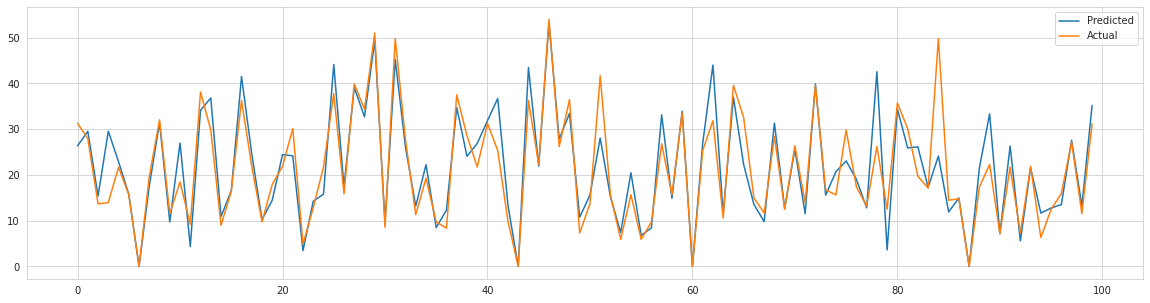

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(20,5))
plt.plot(np.array((y_test1)[100:200]))
plt.plot((Y_pred2_dt)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat ridge training and test data score metrics
# storing the Train set metrics value in a dict7 for later comparison
dict5={'Model':'Decision Tree ',
       'MAE':round((MAE_dt1),2),
       'MSE':round((MSE_dt1),2),
       'RMSE':round((RMSE_dt1),2),
       'R2_score':round((R2_score_dt1),2),
       'Adjusted R2':round((Adjusted_r2_dt1),2)
       }

training_df=training_df.append(dict5,ignore_index=True)
dt_dict5 =pd.DataFrame(dict5,index=[1])

# storing the test set metrics value in a dict8 for later comparison
dict6={'Model':'Decision Tree',
       'MAE':round((MAE_dt2),2),
       'MSE':round((MSE_dt2),2),
       'RMSE':round((RMSE_dt2),2),
       'R2_score':round((R2_score_dt2),2),
       'Adjusted R2':round((Adjusted_r2_dt2 ),2)
       }

test_df=test_df.append(dict6,ignore_index=True)
dt_dict6 =pd.DataFrame(dict6,index=[1])

In [ ]:
result=pd.concat([dt_dict5,dt_dict6],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Decision Tree,3.19,20.90,4.57,0.87,0.87
Test set,1,Decision Tree,3.47,25.87,5.09,0.83,0.84


## **Random Forest**

Random forest is a bagging technique and not a boosting technique. The trees in random forests run in parallel, meaning is no interaction between these trees while building the trees.

Random forest operates by constructing a multitude of decision trees at training time and outputting the class that’s the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf_grid = RandomForestRegressor()

In [ ]:
n_estimators=[90,100,120,150]
max_depth=[19,26]
max_leaf_nodes=[60,80]

params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes }

In [ ]:
# creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_grid,param_grid=params,verbose=0, n_jobs = -1)

In [ ]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [19, 26], 'max_leaf_nodes': [60, 80],
                         'n_estimators': [90, 100, 120, 150]})

In [ ]:
# to see best prameter
rf_grid.best_params_

{'max_depth': 26, 'max_leaf_nodes': 80, 'n_estimators': 120}

In [ ]:
rf_grid.best_score_

0.8554972339849087

In [ ]:
# random forest with best parameter
rf = RandomForestRegressor(max_depth = 26, max_leaf_nodes = 80, n_estimators =  100)

In [ ]:
# fitting x-train and y-train
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, max_leaf_nodes=80)

In [ ]:
# predictions and score
rf_y_pred1 = rf.predict(X_train)
rf_y_pred2 = rf.predict(X_test)
rf.score(X_train, y_train)

0.8800088438439698

In [ ]:
#Score matrics on train data
print(f"Random Forest: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_rf1 = mean_squared_error(y_train, rf_y_pred1)       
print("MSE", MSE_rf1)
MAE_rf1 = mean_absolute_error(y_train, rf_y_pred1)
print('MAE', MAE_rf1)
RSME_rf1 = np.sqrt(mean_squared_error(y_train, rf_y_pred1))
print("RMSE", RSME_rf1)
R2_score_rf1 = r2_score(y_train, rf_y_pred1)
print("R2score", R2_score_rf1)
Adjusted_r2_rf1 = 1-(1-(R2_score_rf1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_rf1)
print()


#Score matrics on train data
print(f"Random Forest: evaluation metrics on the testing set:")
MSE_rf2 = mean_squared_error(y_test, rf_y_pred2)       
print("MSE", MSE_rf2)
MAE_rf2 = mean_absolute_error(y_test, rf_y_pred2)
print('MAE', MAE_rf2)
RSME_rf2 = np.sqrt(mean_squared_error(y_test, rf_y_pred2))
print("RMSE", RSME_rf2)
R2_score_rf2 = r2_score(y_test, rf_y_pred2)
print("R2score", R2_score_rf2)
Adjusted_r2_rf2 = 1-(1-(R2_score_rf2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_rf2)


Random Forest: evaluation metrics on the training set:
MSE 18.612498685558705
MAE 3.1845695746981444
RMSE 4.314220518883881
R2score 0.8800088438439698
Adjusted_R2 0.8862060892231528

Random Forest: evaluation metrics on the testing set:
MSE 21.29282109851957
MAE 3.3208365508584055
RMSE 4.614414491408371
R2score 0.8622481452513199
Adjusted_R2 0.8870719755200125


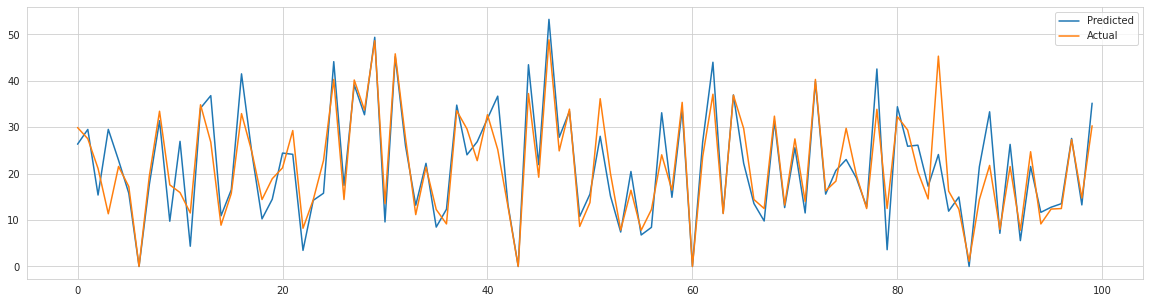

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(20,5))
plt.plot(np.array((y_test)[100:200]))
plt.plot((rf_y_pred2)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat ridge training and test data score metrics

dict7={'Model':'Random Forest ',
       'MAE':round((MAE_rf1),2),
       'MSE':round((MSE_rf1),2),
       'RMSE':round((RSME_rf1),2),
       'R2_score':round((R2_score_rf1),2),
       'Adjusted R2':round((Adjusted_r2_rf1),2)
       }

training_df=training_df.append(dict7,ignore_index=True)
rf_dict7 =pd.DataFrame(dict7,index=[1])

# storing the test set metrics value in a dict10 for later comparison
dict8={'Model':'Random Forest ',
       'MAE':round((MAE_rf2),2),
       'MSE':round((MSE_rf2),2),
       'RMSE':round((RSME_rf2),2),
       'R2_score':round((R2_score_rf2),2),
       'Adjusted R2':round((Adjusted_r2_rf2 ),2)
       }

test_df=test_df.append(dict8,ignore_index=True)
rf_dict8 =pd.DataFrame(dict8,index=[1])

In [ ]:
result=pd.concat([rf_dict7,rf_dict8],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Random Forest,3.18,18.61,4.31,0.88,0.89
Test set,1,Random Forest,3.32,21.29,4.61,0.86,0.89


# **Boosting**

### **Gradient Boost**


Gradient boosting, on the other hand, is a technique for repeatedly adding decision trees so that the next decision tree corrects the previous decision tree error. Compared to Random forest, the results are more sensitive to parameter settings during training. However, with the correct parameter settings, you will get better test results than random forest.

In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
grad_boost =GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[250]
max_depth=[8,10,12]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
grad_boost_grid= GridSearchCV(grad_boost,param_grid=params,cv=5,verbose=0,n_jobs = -1)

In [ ]:
# fitting x-train and y-train
grad_boost_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'n_estimators': [250]})

In [ ]:
grad_boost_grid.best_params_

{'max_depth': 8, 'n_estimators': 250}

In [ ]:
grad_boost_grid.best_score_

0.9033710682815489

In [ ]:
#creating model of Gradient Boosting
grad_boost =GradientBoostingRegressor(max_depth = 8, n_estimators = 250)
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=250)

In [ ]:
# predictions and score
gb_y_pred1 = grad_boost.predict(X_train)
gb_y_pred2 = grad_boost.predict(X_test)
grad_boost.score(X_train, y_train)

0.9937254949883583

In [ ]:
#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_gb1 = mean_squared_error(y_train, gb_y_pred1)       
print("MSE", MSE_gb1)
MAE_gb1 = mean_absolute_error(y_train, gb_y_pred1)
print('MAE', MAE_gb1)
RSME_gb1 = np.sqrt(mean_squared_error(y_train, gb_y_pred1))
print("RMSE", RSME_gb1)
R2_score_gb1 = r2_score(y_train, gb_y_pred1)
print("R2score", R2_score_gb1)
Adjusted_r2_gb1 = 1-(1-(R2_score_gb1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_gb1)
print()


#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the testing set:")
MSE_gb2 = mean_squared_error(y_test, gb_y_pred2)       
print("MSE", MSE_gb2)
MAE_gb2 = mean_absolute_error(y_test, gb_y_pred2)
print('MAE', MAE_gb2)
RSME_gb2 = np.sqrt(mean_squared_error(y_test, gb_y_pred2))
print("RMSE", RSME_gb2)
R2_score_gb2 = r2_score(y_test, gb_y_pred2)
print("R2score", R2_score_gb2)
Adjusted_r2_gb2 = 1-(1-(R2_score_gb2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_gb2)

Gradient Boosting: evaluation metrics on the training set:
MSE 0.9732735313413734
MAE 0.6862414375754229
RMSE 0.9865462641667513
R2score 0.9937254949883583
Adjusted_R2 1.0007235618544734

Gradient Boosting: evaluation metrics on the testing set:
MSE 13.050484184743649
MAE 2.3680593611798195
RMSE 3.612545388606716
R2score 0.9155711498491036
Adjusted_R2 0.9419301312489897


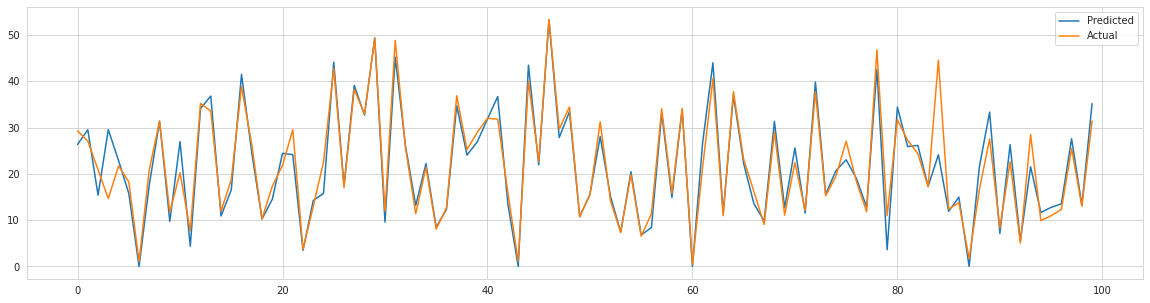

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(20,5))
plt.plot(np.array((y_test)[100:200]))
plt.plot((gb_y_pred2)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat ridge training and test data score metrics

dict9={'Model':'Gradient Boosting',
       'MAE':round((MAE_gb1),2),
       'MSE':round((MSE_gb1),2),
       'RMSE':round((RSME_gb1),2),
       'R2_score':round((R2_score_gb1),2),
       'Adjusted R2':round((Adjusted_r2_gb1),2)
       }
training_df=training_df.append(dict9,ignore_index=True)
gb_dict9 =pd.DataFrame(dict9,index=[1])

# storing the test set metrics value in a dict12 for later comparison
dict10={'Model':'Gradient Boosting',
       'MAE':round((MAE_gb2),2),
       'MSE':round((MSE_gb2),2),
       'RMSE':round((RSME_gb2),2),
       'R2_score':round((R2_score_gb2),2),
       'Adjusted R2':round((Adjusted_r2_gb2 ),2)
       }
test_df=test_df.append(dict10,ignore_index=True)
gb_dict10=pd.DataFrame(dict10,index=[1])

In [ ]:
result=pd.concat([gb_dict9,gb_dict10],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Gradient Boosting,0.69,0.97,0.99,0.99,1.00
Test set,1,Gradient Boosting,2.37,13.05,3.61,0.92,0.94


### **XG BOOST**

XGBoost is a powerful approach for building supervised regression models.

Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions

In [ ]:
xg_boost_model = xgb.XGBRegressor(objective ='reg:squarederror')


In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[200,250,270]
max_depth=[10,15,20]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
# finding best parameters
xg_boost_gridsearch = GridSearchCV(xg_boost_model,params,verbose = 0)


In [ ]:
xg_boost_gridsearch.fit(X_train,y_train)


GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [200, 250, 270]})

In [ ]:
xg_boost_gridsearch.best_params_

{'max_depth': 10, 'n_estimators': 270}

In [ ]:
xg_boost_gridsearch.best_score_

0.908992356254126

In [ ]:
# XG boost model with best parameters
xg_boost = xgb.XGBRegressor(n_estimators=270,max_depth=10)

In [ ]:

xg_boost.fit(X_train,y_train)

[09:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10, n_estimators=270)

In [ ]:
# predictions and score
xb_y_pred1 = xg_boost.predict(X_train)
xb_y_pred2 = xg_boost.predict(X_test)
xg_boost.score(X_train, y_train)

0.9983950351445653

In [ ]:
#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the training set:")
#importing matrics for training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE_xb1 = mean_squared_error(y_train, xb_y_pred1)       
print("MSE",MSE_xb1)
MAE_xb1 = mean_absolute_error(y_train,xb_y_pred1)
print('MAE', MAE_xb1)
RSME_xb1 = np.sqrt(mean_squared_error(y_train, xb_y_pred1))
print("RMSE", RSME_xb1)
R2_score_xb1 = r2_score(y_train, xb_y_pred1)
print("R2score", R2_score_xb1)
Adjusted_r2_xb1 = 1-(1-(R2_score_xb1)* (X_train.shape[0]-1)/ (X_train.shape[0]-1 -(X_train.shape[1])))
print("Adjusted_R2", Adjusted_r2_xb1)
print()


#Score matrics on train data
print(f"Gradient Boosting: evaluation metrics on the testing set:")
MSE_xb2 = mean_squared_error(y_test, xb_y_pred2)       
print("MSE", MSE_xb2)
MAE_xb2 = mean_absolute_error(y_test,xb_y_pred2)
print('MAE', MAE_xb2)
RSME_xb2 = np.sqrt(mean_squared_error(y_test,xb_y_pred2))
print("RMSE", RSME_xb2)
R2_score_xb2 = r2_score(y_test,xb_y_pred2)
print("R2score",R2_score_xb2)
Adjusted_r2_xb2 = 1-(1-(R2_score_xb2)* (X_test.shape[0]-1)/ (X_test.shape[0]-1 -(X_test.shape[1])))
print("Adjusted_R2", Adjusted_r2_xb2)

Gradient Boosting: evaluation metrics on the training set:
MSE 0.2489550665159181
MAE 0.3168418220985269
RMSE 0.4989539723420569
R2score 0.9983950351445653
Adjusted_R2 1.0054259860962875

Gradient Boosting: evaluation metrics on the testing set:
MSE 12.768694384172083
MAE 2.334665857977434
RMSE 3.5733309928093817
R2score 0.917394161816301
Adjusted_R2 0.9438056271094847


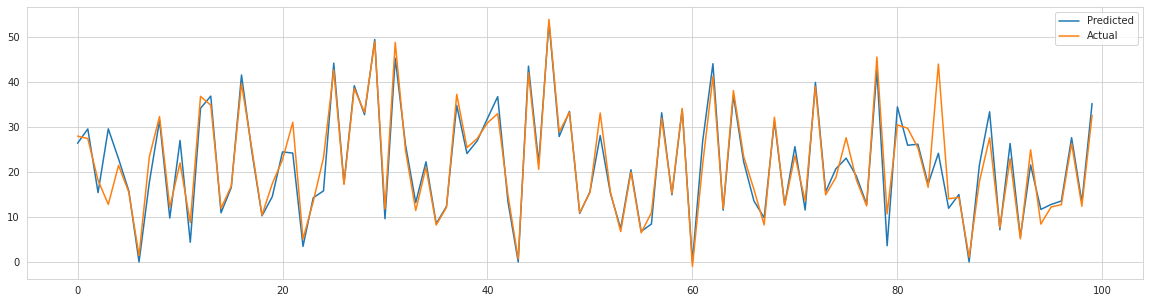

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(20,5))
plt.plot(np.array((y_test)[100:200]))
plt.plot((xb_y_pred2)[100:200])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# creating a dict to concat ridge training and test data score metrics

dict11={'Model':'XG Boosting',
       'MAE':round((MAE_xb1),2),
       'MSE':round((MSE_xb1),2),
       'RMSE':round((RSME_xb1),2),
       'R2_score':round((R2_score_xb1),2),
       'Adjusted R2':round((Adjusted_r2_xb1),2)
       }
training_df=training_df.append(dict11,ignore_index=True)
gb_dict11 =pd.DataFrame(dict11,index=[1])

# storing the test set metrics value in a dict12 for later comparison
dict12={'Model':'XG Boosting',
       'MAE':round((MAE_xb2),2),
       'MSE':round((MSE_xb2),2),
       'RMSE':round((RSME_xb2),2),
       'R2_score':round((R2_score_xb2),2),
       'Adjusted R2':round((Adjusted_r2_xb2 ),2)
       }
test_df=test_df.append(dict12,ignore_index=True)
gb_dict12=pd.DataFrame(dict12,index=[1])

In [ ]:
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model   MAE    MSE  RMSE  R2_score  Adjusted R2
Training set 0  Linear regression   4.56  35.24  5.94      0.77         0.77
             1   Lasso regression   4.56  35.24  5.94      0.77         0.78
             2      Decision Tree   3.19  20.90  4.57      0.87         0.87
             3      Random Forest   3.18  18.61  4.31      0.88         0.89
             4   Gradient Boosting  0.69   0.97  0.99      0.99         1.00
             5         XG Boosting  0.32   0.25  0.50      1.00         1.01
Test set     0  Linear regression   4.64  35.82  5.99      0.77         0.76
             1   Lasso regression   4.64  35.83  5.99      0.77         0.79
             2       Decision Tree  3.47  25.87  5.09      0.83         0.84
             3      Random Forest   3.32  21.29  4.61      0.86         0.89
             4   Gradient Boosting  2.37  13.05  3.61      0.92         0.94
             5         XG Boosting  2.33  12.77  3.57      0.92         0.94

## **Observations**

There is a high co-relation between rental bike count and Temperature as the temperature decrease the bike count is less

In summer seasons the number of bike count is more compare to others seasons.


Here a trend we observed that people used rented bikesmore during working  hours i.e. from 7am to 9am in morning and 5pm to 7pm in the evening.

There is rented bike count in non functional HRs.

After performing the various models. Random Forest and Gradient boosting found to be the best model that can be used for the Bike Sharing Demand Prediction 





## **Conclusion**

After using all model we got conclusion that :
Gradient Decent (92% accuracy)
XG boosting (92% accuracy)
are best model to deploy by appling Gridsearch CV.

As this data is time dependent, the values for variables will not always be consistent. Therefore, we need constantly keep checking for the models.
